In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, RMSprop, Adadelta, Adam
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [4]:
# Step 1: Data Pre-processing
# Load the dataset
df = pd.read_csv('/content/Crystal_structure.csv')

In [5]:
corr_matrix=df.corr()
print(corr_matrix)

               In literature  r(AXII)(Å)     r(AVI)(Å)  r(BVI)(Å)  \
In literature       1.000000    0.183138  1.571233e-01  -0.132859   
r(AXII)(Å)          0.183138    1.000000  9.374915e-01  -0.005210   
r(AVI)(Å)           0.157123    0.937492  1.000000e+00   0.002976   
r(BVI)(Å)          -0.132859   -0.005210  2.976284e-03   1.000000   
EN(A)              -0.186487   -0.627417 -6.276035e-01  -0.004038   
EN(B)               0.047653    0.009343  1.280092e-07  -0.627911   
l(A-O)(Å)           0.112333    0.327965  2.579035e-01  -0.006976   
l(B-O)(Å)          -0.018337   -0.001212 -3.064064e-07   0.280566   
ΔENR                0.014930   -0.455477 -4.413984e-01  -0.847304   
tG                  0.231562    0.798824  7.454083e-01  -0.591207   
μ                  -0.132841   -0.005205  2.979491e-03   1.000000   

                      EN(A)         EN(B)     l(A-O)(Å)     l(B-O)(Å)  \
In literature -1.864866e-01  4.765290e-02  1.123334e-01 -1.833665e-02   
r(AXII)(Å)    -6.274166e-

<ipython-input-5-cebeeebd8aa2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


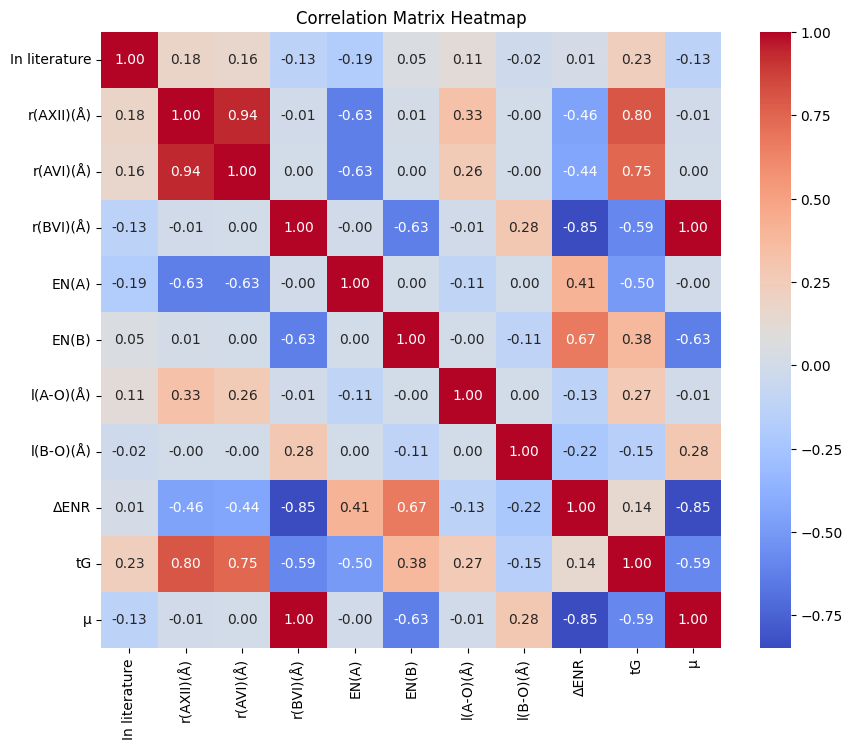

In [6]:
# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [7]:
# Set the threshold for correlation
threshold = 0.3  # Example threshold, adjust as needed

# Set diagonal elements of correlation matrix to 0
np.fill_diagonal(corr_matrix.values, 0)

corr_matrix

,In literature,r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,μ
In literature,0.000000,0.183138,1.571233e-01,-0.132859,-1.864866e-01,4.765290e-02,1.123334e-01,-1.833665e-02,0.014930,0.231562,-0.132841
r(AXII)(Å),0.183138,0.000000,9.374915e-01,-0.005210,-6.274166e-01,9.343451e-03,3.279648e-01,-1.212017e-03,-0.455477,0.798824,-0.005205
r(AVI)(Å),0.157123,0.937492,0.000000e+00,0.002976,-6.276035e-01,1.280092e-07,2.579035e-01,-3.064064e-07,-0.441398,0.745408,0.002979
r(BVI)(Å),-0.132859,-0.005210,2.976284e-03,0.000000,-4.037933e-03,-6.279114e-01,-6.975818e-03,2.805661e-01,-0.847304,-0.591207,1.000000
EN(A),-0.186487,-0.627417,-6.276035e-01,-0.004038,0.000000e+00,7.377587e-17,-1.106014e-01,3.319693e-16,0.410564,-0.497564,-0.004042
EN(B),0.047653,0.009343,1.280092e-07,-0.627911,7.377587e-17,0.000000e+00,-3.285892e-16,-1.140845e-01,0.671796,0.377332,-0.627914
l(A-O)(Å),0.112333,0.327965,2.579035e-01,-0.006976,-1.106014e-01,-3.285892e-16,0.000000e+00,1.139524e-17,-0.126965,0.266484,-0.006974
l(B-O)(Å),-0.018337,-0.001212,-3.064064e-07,0.280566,3.319693e-16,-1.140845e-01,1.139524e-17,0.000000e+00,-0.223020,-0.154808,0.280566
ΔENR,0.014930,-0.455477,-4.413984e-01,-0.847304,4.105635e-01,6.717962e-01,-1.269648e-01,-2.230204e-01,0.000000,0.142509,-0.847307
tG,0.231562,0.798824,7.454083e-01,-0.591207,-4.975641e-01,3.773318e-01,2.664836e-01,-1.548084e-01,0.142509,0.000000,-0.591202


In [8]:
# Find columns with correlation below the threshold
low_corr_columns = corr_matrix.columns[(abs(corr_matrix) < threshold).all()]

# Remove low correlation columns
df_new = df.drop(low_corr_columns, axis=1)

# Print removed columns
print("Removed columns:", low_corr_columns.tolist())

# Display the filtered data
print(df_new)

Removed columns: ['In literature', 'l(B-O)(Å)']
     Compound   A   B v(A) v(B)  r(AXII)(Å)  r(AVI)(Å)  r(BVI)(Å)  EN(A)  \
0       Ac2O3  Ac  Ac    0    0        1.12       1.12       1.12   1.10   
1      AcAgO3  Ac  Ag    0    0        1.12       1.12       0.95   1.10   
2      AcAlO3  Ac  Al    0    0        1.12       1.12       0.54   1.10   
3      AcAsO3  Ac  As    0    0        1.12       1.12       0.52   1.10   
4      AcAuO3  Ac  Au    0    0        1.12       1.12       0.93   1.10   
...       ...  ..  ..  ...  ...         ...        ...        ...    ...   
5324    ZrWO3  Zr   W    1    5        0.89       0.72       0.62   1.33   
5325    ZrYO3  Zr   Y    -    -        0.89       0.72       0.90   1.33   
5326   ZrYbO3  Zr  Yb    -    -        0.89       0.72       0.95   1.33   
5327   ZrZnO3  Zr  Zn    -    -        0.89       0.72       0.74   1.33   
5328    Zr2O3  Zr  Zr    -    -        0.89       0.72       0.72   1.33   

      EN(B)  l(A-O)(Å)      ΔENR       

In [9]:
df_new.head()

,Compound,A,B,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),ΔENR,tG,τ,μ,Lowest distortion
0,Ac2O3,Ac,Ac,0,0,1.12,1.12,1.12,1.1,1.10,0.0,-3.248000,0.707107,-,0.800000,cubic
1,AcAgO3,Ac,Ag,0,0,1.12,1.12,0.95,1.1,1.93,0.0,-2.565071,0.758259,-,0.678571,orthorhombic
2,AcAlO3,Ac,Al,0,0,1.12,1.12,0.54,1.1,1.61,0.0,-1.846714,0.918510,-,0.385714,cubic
3,AcAsO3,Ac,As,0,0,1.12,1.12,0.52,1.1,2.18,0.0,-1.577429,0.928078,-,0.371429,orthorhombic
4,AcAuO3,Ac,Au,0,0,1.12,1.12,0.93,1.1,2.54,0.0,-2.279786,0.764768,-,0.664286,orthorhombic


In [10]:
# Iterate through each column
columns_with_any_dash = []
for column in df.columns:
    if '-' in df[column].values:
        columns_with_any_dash.append(column)
# Print columns with at least one '-'
print("Columns with at least one '-':")
for col in columns_with_any_dash:
    print(col)

Columns with at least one '-':
v(A)
v(B)
τ
Lowest distortion


<ipython-input-10-afb160cebe66>:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if '-' in df[column].values:


In [11]:
df_new.replace('-',np.nan,inplace=True)
df_new.head()
df_new['Lowest distortion'].unique()

array(['cubic', 'orthorhombic', 'rhombohedral', 'tetragonal', nan],
      dtype=object)

In [12]:
imputer = KNNImputer(n_neighbors=5)

columns_to_impute='v(A)','v(B)','τ'
# Replace the value of n_neighbors as needed
imputer = KNNImputer(n_neighbors=5)

# Perform KNN imputation only on columns where at least one value is '-'
for column in columns_to_impute:
    df_new[column] = imputer.fit_transform(df_new[[column]])

# Print the DataFrame after KNN imputation
df_new.head()

,Compound,A,B,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),ΔENR,tG,τ,μ,Lowest distortion
0,Ac2O3,Ac,Ac,0.0,0.0,1.12,1.12,1.12,1.1,1.10,0.0,-3.248000,0.707107,2.503861,0.800000,cubic
1,AcAgO3,Ac,Ag,0.0,0.0,1.12,1.12,0.95,1.1,1.93,0.0,-2.565071,0.758259,2.503861,0.678571,orthorhombic
2,AcAlO3,Ac,Al,0.0,0.0,1.12,1.12,0.54,1.1,1.61,0.0,-1.846714,0.918510,2.503861,0.385714,cubic
3,AcAsO3,Ac,As,0.0,0.0,1.12,1.12,0.52,1.1,2.18,0.0,-1.577429,0.928078,2.503861,0.371429,orthorhombic
4,AcAuO3,Ac,Au,0.0,0.0,1.12,1.12,0.93,1.1,2.54,0.0,-2.279786,0.764768,2.503861,0.664286,orthorhombic


In [13]:
columns_to_encode=['Compound','A','B','Lowest distortion']
# Perform one-hot encoding for each specified column
for column in columns_to_encode:
    data_reshaped = df_new[column].values.reshape(-1, 1)
    encoder = OneHotEncoder()
    one_hot_encoded = encoder.fit_transform(data_reshaped)
    one_hot_df = pd.DataFrame(one_hot_encoded.toarray(), columns=encoder.get_feature_names_out([column]))
    df_new = pd.concat([df_new, one_hot_df], axis=1)
    df_new.drop(columns=[column], inplace=True)

# Perform KNN imputation
'''imputer_knn = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer_knn.fit_transform(df), columns=df_new.columns)

# Print the DataFrame after KNN imputation
print(df_imputed)'''

'imputer_knn = KNNImputer(n_neighbors=5)\ndf_imputed = pd.DataFrame(imputer_knn.fit_transform(df), columns=df_new.columns)\n\n# Print the DataFrame after KNN imputation\nprint(df_imputed)'

In [14]:
df_new.head()

,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),ΔENR,tG,...,B_W,B_Y,B_Yb,B_Zn,B_Zr,Lowest distortion_cubic,Lowest distortion_orthorhombic,Lowest distortion_rhombohedral,Lowest distortion_tetragonal,Lowest distortion_nan
0,0.0,0.0,1.12,1.12,1.12,1.1,1.10,0.0,-3.248000,0.707107,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.12,1.12,0.95,1.1,1.93,0.0,-2.565071,0.758259,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.12,1.12,0.54,1.1,1.61,0.0,-1.846714,0.918510,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.12,1.12,0.52,1.1,2.18,0.0,-1.577429,0.928078,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.12,1.12,0.93,1.1,2.54,0.0,-2.279786,0.764768,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [17]:
# Perform KNN imputation for the four columns
imputer_knn = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer_knn.fit_transform(df_new.drop(columns=['Lowest distortion_nan'])), columns=df_new.drop(columns=['Lowest distortion_nan']).columns)

# Get the values from the 'Lowest distortion_nan' column
nan_values = df_new['Lowest distortion_nan']



# Fill the missing values in the other four columns based on the 'nan_values'
for col in ['cubic', 'orthorhombic', 'tetragonal', 'rhombohedral']:
    df_imputed['Lowest distortion_' + col] = df_imputed['Lowest distortion_' + col].where(nan_values != 1, 1)

# Print the DataFrame after imputing values
print(df_imputed)

          v(A)     v(B)  r(AXII)(Å)  r(AVI)(Å)  r(BVI)(Å)  EN(A)  EN(B)  \
0     0.000000  0.00000        1.12       1.12       1.12   1.10   1.10   
1     0.000000  0.00000        1.12       1.12       0.95   1.10   1.93   
2     0.000000  0.00000        1.12       1.12       0.54   1.10   1.61   
3     0.000000  0.00000        1.12       1.12       0.52   1.10   2.18   
4     0.000000  0.00000        1.12       1.12       0.93   1.10   2.54   
...        ...      ...         ...        ...        ...    ...    ...   
5324  1.000000  5.00000        0.89       0.72       0.62   1.33   2.36   
5325  1.600638  2.25377        0.89       0.72       0.90   1.33   1.22   
5326  1.600638  2.25377        0.89       0.72       0.95   1.33   1.10   
5327  1.600638  2.25377        0.89       0.72       0.74   1.33   1.65   
5328  1.600638  2.25377        0.89       0.72       0.72   1.33   1.33   

      l(A-O)(Å)      ΔENR        tG  ...  B_V  B_W  B_Y  B_Yb  B_Zn  B_Zr  \
0       0.00000 -3.248

Epoch 1/50
107/107 [==============================] - 2s 10ms/step - loss: 1.0288 - accuracy: 0.5666 - val_loss: 0.8894 - val_accuracy: 0.6049
Epoch 2/50
107/107 [==============================] - 1s 9ms/step - loss: 0.9184 - accuracy: 0.6246 - val_loss: 0.8440 - val_accuracy: 0.6049
Epoch 3/50
107/107 [==============================] - 1s 10ms/step - loss: 0.8755 - accuracy: 0.6279 - val_loss: 0.8047 - val_accuracy: 0.6319
Epoch 4/50
107/107 [==============================] - 1s 12ms/step - loss: 0.8010 - accuracy: 0.6543 - val_loss: 0.7704 - val_accuracy: 0.6612
Epoch 5/50
107/107 [==============================] - 2s 15ms/step - loss: 0.7460 - accuracy: 0.7018 - val_loss: 0.7494 - val_accuracy: 0.6741
Epoch 6/50
107/107 [==============================] - 1s 7ms/step - loss: 0.6932 - accuracy: 0.7235 - val_loss: 0.7240 - val_accuracy: 0.6999
Epoch 7/50
107/107 [==============================] - 1s 8ms/step - loss: 0.6225 - accuracy: 0.7545 - val_loss: 0.7109 - val_accuracy: 0.6940
Ep

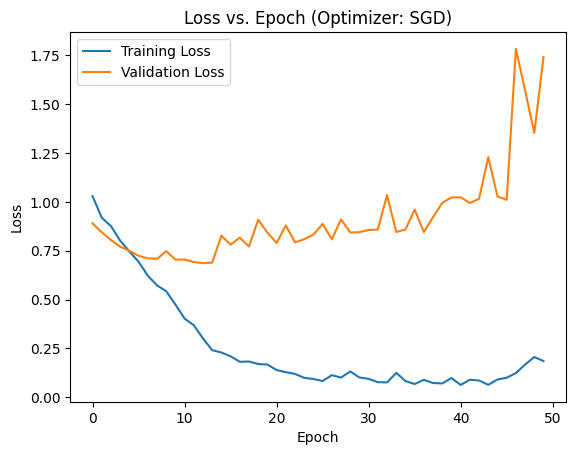

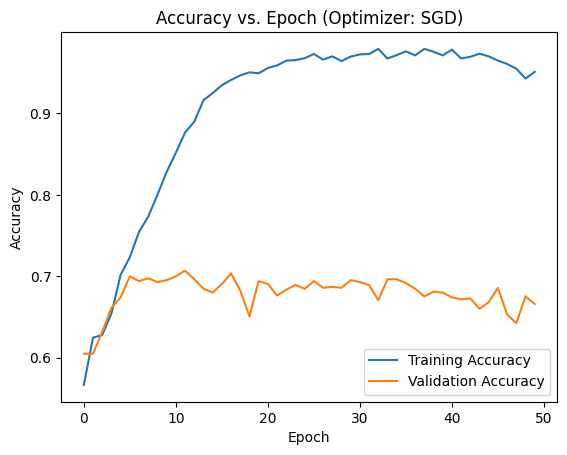

34/34 [==============================] - 0s 3ms/step - loss: 1.8268 - accuracy: 0.6567
Optimizer: RMSprop, Test accuracy: 0.6566604375839233


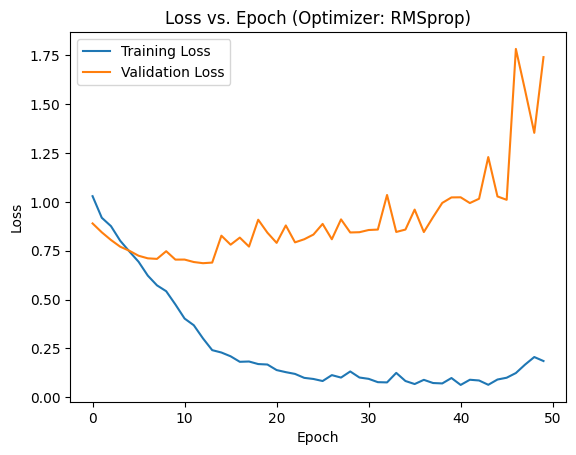

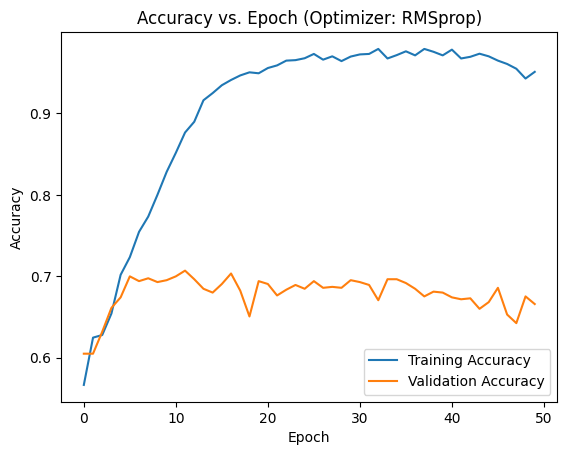

34/34 [==============================] - 0s 4ms/step - loss: 1.8268 - accuracy: 0.6567
Optimizer: Adadelta, Test accuracy: 0.6566604375839233


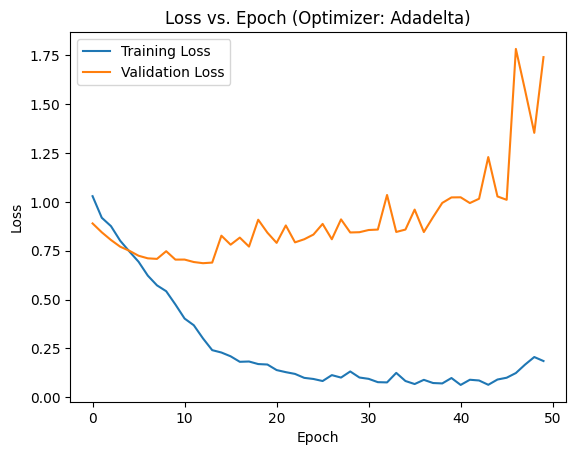

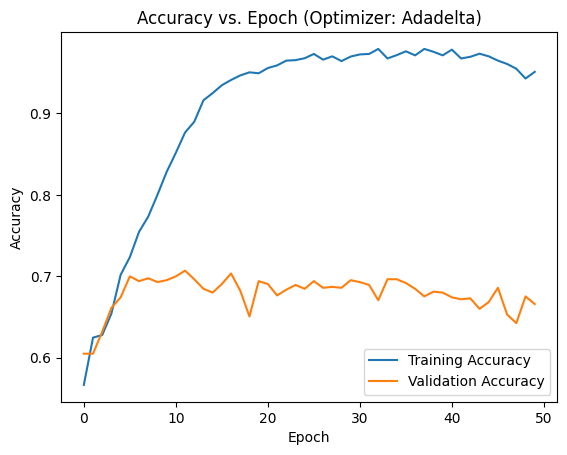

34/34 [==============================] - 0s 3ms/step - loss: 1.8268 - accuracy: 0.6567
Optimizer: Adam, Test accuracy: 0.6566604375839233


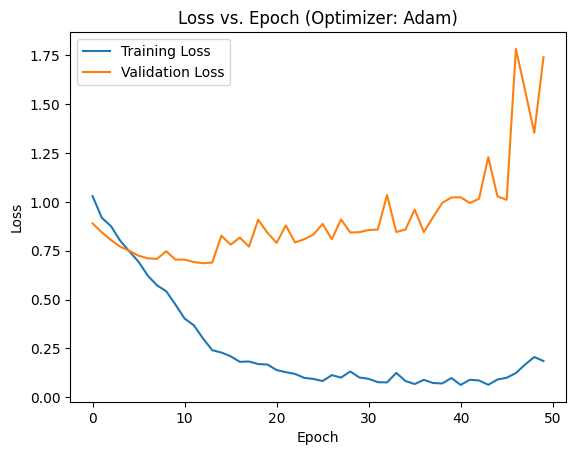

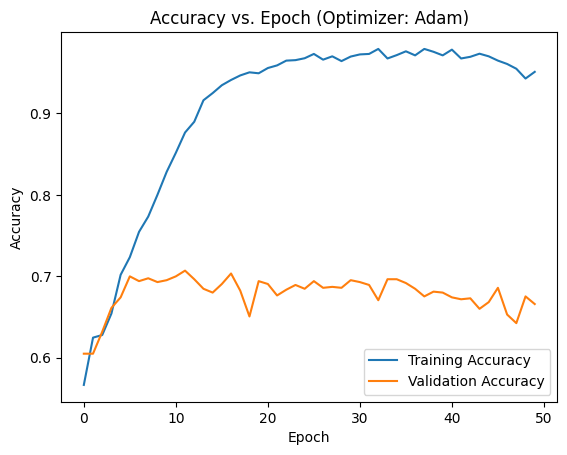

In [20]:

# Split the dataset into features (X) and target variable (y)
X = df_new.drop(columns=['Lowest distortion_cubic', 'Lowest distortion_orthorhombic', 'Lowest distortion_tetragonal', 'Lowest distortion_rhombohedral'])
y = df_new[['Lowest distortion_cubic', 'Lowest distortion_orthorhombic', 'Lowest distortion_tetragonal', 'Lowest distortion_rhombohedral']]

# Split the dataset into training, validation, and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Build a deep neural network
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

# Train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on test data with different optimizers
optimizers = ['SGD', 'RMSprop', 'Adadelta', 'Adam']
for optimizer in optimizers:
    if optimizer == 'SGD':
        opt = SGD()
    elif optimizer == 'RMSprop':
        opt = RMSprop()
    elif optimizer == 'Adadelta':
        opt = Adadelta()
    elif optimizer == 'Adam':
        opt = Adam()

    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f'Optimizer: {optimizer}, Test accuracy: {test_acc}')

    # Plot loss and accuracy vs. epoch
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'Loss vs. Epoch (Optimizer: {optimizer})')
    plt.show()

    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f'Accuracy vs. Epoch (Optimizer: {optimizer})')
    plt.show()